#### Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Unziping Custom data

In [2]:
!ls '/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection'

custom_dataset.zip  Mushroom_yolov3_Obj_detection.ipynb


In [3]:
!unzip '/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/custom_dataset.zip' -d '/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection'

Archive:  /content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/custom_dataset.zip
   creating: /content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/Custom_data/
  inflating: /content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/Custom_data/1.jpg  
  inflating: /content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/Custom_data/1.txt  
  inflating: /content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/Custom_data/10.jpg  
  inflating: /content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/Custom_data/10.txt  
  inflating: /content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/Custom_data/11.jpg  
  inflating: /content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/Custom_data/11.txt  
  inflating: /content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/Custom_data/12.jpg  
  inflating: /content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/Custom_data/12.txt  
  inflating: /content/dri

#### Cloning Darknet Github Repo

In [4]:
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/darknet'

Cloning into '/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/darknet'...
remote: Enumerating objects: 15460, done.
remote: Total 15460 (delta 0), reused 0 (delta 0), pack-reused 15460
Receiving objects: 100% (15460/15460), 14.07 MiB | 8.22 MiB/s, done.
Resolving deltas: 100% (10387/10387), done.
Checking out files: 100% (2053/2053), done.


#### Making Changes in Make file to enable GPU and OpenCV

In [8]:
%cd '/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/darknet'

/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/darknet


In [9]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

## Step 3: Configuring Files for Training

**This step involves properly configuring your custom .cfg file, obj.data, obj.names and train.txt file.**

## i) yolov3.Cfg File Changes
Copy over the yolov3.cfg to edit

### **1. Changing batches and subdivision**

    batches = 2

    subdivision = 8
### **2. Changes in Max Batches**

    Default : max_batches = 500200 

    Change it to according formula: max_batches = number of classes*2000  = 2000

### **3.Changes in line steps**
    Default : steps=400000,450000
    Change to 10% Margin : steps = 1800,2000

### **4.Changes in Yolo Layer**
    Default :classes=80
    Change to : No of classes = classes = 1
### **5.Changes in No of Filter**
    Default : filters=255
    Change to : Filters = (Number of classes * 3) +5 = 18


**Note:** I set my **max_batches = 2000**, **steps = 1800, 2200**, I changed the **classes = 1** in the three YOLO layers and **filters = 18** in the three convolutional layers before the YOLO layers. 

#### Compliation: Make file

In [12]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

## ii) obj.names and obj.data using Python Script

In [43]:
%cd '/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection'

/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection


In [49]:
!python Custom_data/creating-files-data-and-name.py

## iii) Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images.

In [46]:
!python Custom_data/creating-train-and-test-txt-files.py

## Step 4: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long.

## Step 5: Train Your Custom Object Detector!
We are now ready to train images on custom YOLOv3 object detector  

In [51]:
!darknet/darknet

usage: darknet/darknet <function>


In [52]:
!darknet/darknet detector train Custom_data/labelled_data.data darknet/cfg/yolov3.cfg custom_weights/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000003, iou_loss = 0.000000, total_loss = 0.000003 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000003, iou_loss = 0.000000, total_loss = 0.000003 
 total_bbox = 36553, rewritten_bbox = 0.399420 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.806007), count: 3, class_loss = 0.196317, iou_loss = 0.751687, total_loss = 0.948004 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.799490), count: 1, class_loss = 0.075851, iou_loss = 0.084287, total_loss = 0.160138 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000009, iou_loss = 0.000000, total_loss = 0.000009 
 total_bbox = 36557, rewritten_bbox = 0.399376 % 
v3 (mse

In [14]:
%cd '/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/custom_weights'

/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/custom_weights


In [15]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2022-08-02 10:18:58--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2022-08-02 10:18:58--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  2.23MB/s    in 38s     

2022-08-02 10:19:36 (4.13 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [80]:
from matplotlib import *
from google.colab.patches import cv2_imshow

In [71]:
%cd "/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection"

/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection


# Step 6: Testing Custom Object Detector with Test image !!!
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

In [61]:
# need to set our custom cfg to test mode 
%cd '/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/darknet/cfg'


/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/darknet/cfg


In [64]:
%cd ..

/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection


In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [85]:
%cd "/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection"

/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection


In [96]:
#path = "/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection"
weight = r"/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/backup/yolov3_final.weights"
cfg = r"/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/darknet/cfg/yolov3.cfg"
net = cv2.dnn.readNetFromDarknet(cfg,weight)

In [98]:
classes = []
with open('/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/Custom_data/classes.names','r') as f:
    classes = f.read().splitlines()

In [100]:
img = cv2.imread('/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection/Custom_data/9.jpg')
hight,width,_ = img.shape
blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)
net.setInput(blob)
output_layers_name = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_name)

In [101]:
boxes =[]
confidences = []
class_ids = []

for output in layerOutputs:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.6:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * hight)
            w = int(detection[2] * width)
            h = int(detection[3]* hight)
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [102]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.6,.5)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size =(len(boxes),3))

In [107]:
if  len(indexes)>0:
    for i in indexes.flatten():
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = str(round(confidences[i],2))
        color = colors[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,5)
        cv2.putText(img, label + " " + confidence, (x-10,y-10),font,2,color,2)
        #cv2.putText(img, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
else:
    print('Classs not found')

In [116]:
from google.colab.patches import cv2_imshow

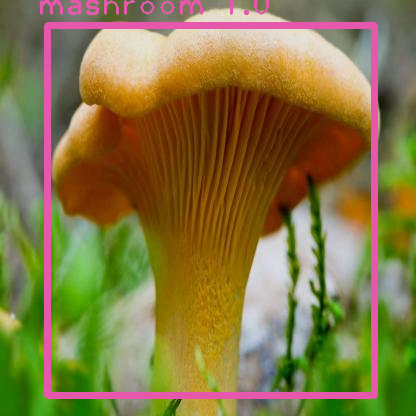

In [120]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()